In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_drop_id = df.drop(['PassengerId'], axis=1)
df_drop_id.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_drop_id['Survived'].unique()

array([0, 1])

In [7]:
df_drop_cabin = df_drop_id.drop(['Cabin'], axis=1)
df_drop_cabin.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
df_drop_cabin['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
df_fill_embarked = df_drop_cabin
df_fill_embarked['Embarked'] = df_drop_cabin['Embarked'].fillna('S')
df_fill_embarked.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
df_fill_embarked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


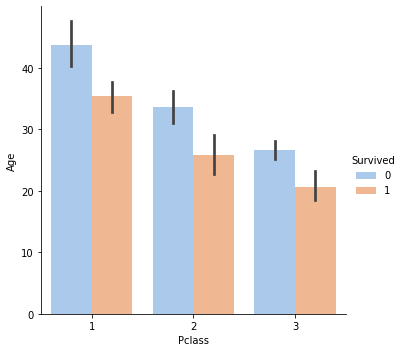

In [11]:
g = sns.catplot("Pclass", "Age", "Survived", data=df_fill_embarked, kind="bar", palette="pastel")
plt.show()

In [12]:
df_age_null = df_fill_embarked[df_fill_embarked['Age'].isnull() == True]
df_age_not_null = df_fill_embarked[df_fill_embarked['Age'].isnull() == False]

In [13]:
df_age_null.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q


In [14]:
df_age_not_null.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
df_age_not_null_grouped = df_age_not_null.groupby(['Pclass', 'Sex'])
df_age_not_null_grouped.first()

Survived                                               Name  \
Pclass Sex                                                                   
1      female         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
       male           0                            McCarthy, Mr. Timothy J   
2      female         1                Nasser, Mrs. Nicholas (Adele Achem)   
       male           0                               Fynney, Mr. Joseph J   
3      female         1                             Heikkinen, Miss. Laina   
       male           0                            Braund, Mr. Owen Harris   

                Age  SibSp  Parch            Ticket     Fare Embarked  
Pclass Sex                                                             
1      female  38.0      1      0          PC 17599  71.2833        C  
       male    54.0      0      0             17463  51.8625        S  
2      female  14.0      1      0            237736  30.0708        C  
       male    35.0      0      0            239865  26.0000        S  
3      female  26.0      0      0  STON/O2. 3101282   7.9250        S  
       male    22.0      1      0         A/5 21171   7.2500        S

In [16]:
age_mean = df_age_not_null_grouped['Age'].mean().to_dict()
age_mean

{(1, 'female'): 34.61176470588235,
 (1, 'male'): 41.28138613861386,
 (2, 'female'): 28.722972972972972,
 (2, 'male'): 30.74070707070707,
 (3, 'female'): 21.75,
 (3, 'male'): 26.507588932806325}

In [17]:
df_age_null.loc[::, 'Age'] = df_age_null.apply(lambda x: age_mean[(x['Pclass'], x['Sex'])], axis=1)
df_age_null.head()

/home/vccolombo/Programing/titanic/.venv/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0,3,"Moran, Mr. James",male,26.507589,0,0,330877,8.4583,Q
17,1,2,"Williams, Mr. Charles Eugene",male,30.740707,0,0,244373,13.0000,S
19,1,3,"Masselmani, Mrs. Fatima",female,21.750000,0,0,2649,7.2250,C
26,0,3,"Emir, Mr. Farred Chehab",male,26.507589,0,0,2631,7.2250,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,21.750000,0,0,330959,7.8792,Q


In [18]:
df_age_concat = pd.concat([df_age_null, df_age_not_null])
df_age_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 5 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB
